<a href="https://colab.research.google.com/github/eoinleen/biochem-general/blob/main/Final_gold_standard_AKTA_SEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ml7 column data with corresponding Fractions for the first 90 rows:
  ml7   Fractions
  NaN (Fractions)
 0.00           1
 0.16           2
 0.28           3
 1.27           4
 2.27           5
 3.27           6
 4.27           7
 5.27           8
 6.27           9
 7.27          10
 8.27          11
 9.27          12
10.27          13
11.27          14
12.27          15
13.27          16
14.27          17
15.27          18
16.27          19
17.27          20
18.27          21
19.27          22
20.27          23
21.27          24
22.27          25
23.27          26
24.27          27
25.27          28
26.27          29
27.27          30
28.27          31
29.27          32
30.28          33
31.28          34
32.28          35
33.28          36
34.27          37
35.27          38
36.27          39
37.27          40
38.27          41
39.27          42
40.27          43
41.27          44
42.27          45
43.27          46
44.27          47
45.27          48
46.27          49
47.27         

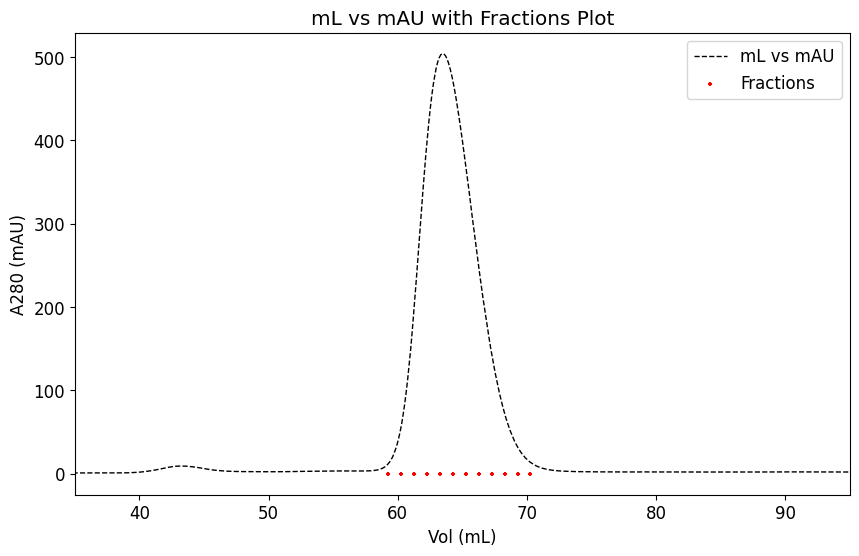

In [3]:
"""
This code was predominantly written by Copilot with interactive instructions.
It is designed to take raw data from an AKTA SEC (Size-Exclusion Chromatography)
 run in `.xls` format and plot it. The main objectives of this code are to read
 the data, preprocess it, and generate a plot illustrating the relationship
 between volume (mL) and absorbance (mAU) while highlighting specific fractions.

### Detailed Breakdown:

1. **Importing Libraries**:
   The necessary libraries are imported at the beginning of the code:
   - `pandas` for data manipulation and analysis.
   - `matplotlib.pyplot` for creating plots.

2. **Reading the Data**:
   The code specifies and reads the data file using `pandas`. The file is
   assumed to be in `.xls` format, and the data starts from the second row
   (hence `header=1`).

3. **Data Preprocessing**:
   Specific columns (`ml1`, `mAu1`, `ml7`) are converted to numeric types to
   ensure proper handling and plotting of data.

4. **Printing Data**:
   The first 90 rows of the `ml7` column along with the corresponding
   "Fractions" are printed for verification purposes.

5. **Filtering Data**:
   A specific range of fraction values is defined, and the DataFrame is filtered
    to include only rows within this range.

6. **Setting Font Properties**:
   Font properties are set to enhance the readability of the plot.

7. **Creating the Plot**:
   The plot is generated using `matplotlib.pyplot`:
   - The relationship between volume (mL) and absorbance (mAU) is plotted as a
   black dashed line.
   - The filtered fraction data is plotted as fine red crosses at y=0 to
   highlight the fractions of interest.

8. **Plot Customization**:
   Additional customization includes setting x-axis limits, making the plot
   background transparent, removing grid lines, and updating axis labels.

This code provides a visual representation of specific fractions from an AKTA
SEC run, facilitating easier analysis and interpretation of the results.
Ensure you upload your `.xls` file to your drive and adjust the file path
accordingly.
"""



import pandas as pd
import matplotlib.pyplot as plt

# Use your specified file path
file_path = '/content/drive/MyDrive/SEC-data/test1.xls'
df = pd.read_excel(file_path, header=1)  # Assuming your data starts at the second row
df.columns = ['ml1', 'mAu1', 'ml2', 'mS/cm', 'ml3', 'Unnamed: 5', 'ml4', 'MPa', 'ml5', 'C', 'ml6', '%B', 'ml7', 'Fractions', 'ml8', 'Injections', 'ml9', 'Set Marks']

# Convert columns to numeric types if necessary
df['ml1'] = pd.to_numeric(df['ml1'], errors='coerce')
df['mAu1'] = pd.to_numeric(df['mAu1'], errors='coerce')
df['ml7'] = pd.to_numeric(df['ml7'], errors='coerce')

# Print the first 90 rows of the ml7 column with the corresponding Fractions
print("ml7 column data with corresponding Fractions for the first 90 rows:")
print(df[['ml7', 'Fractions']].head(90).to_string(index=False))

# Define fraction range variables
fraction_start = 59.27
fraction_end = 70.27

# Filter the DataFrame to include only the specified range for ml7
filtered_df = df[(df['ml7'] >= fraction_start) & (df['ml7'] <= fraction_end)]

# Set font properties
font = {'family': 'DejaVu Sans', 'size': 12}
plt.rc('font', **font)

# Plot mL versus mAU with black dashed line and no data points
plt.figure(figsize=(10, 6))
plt.plot(df['ml1'], df['mAu1'], linestyle='--', linewidth=1, color='black', label='mL vs mAU')

# Plot filtered fractions as fine red crosses at y=0
plt.scatter(filtered_df['ml7'], [0]*len(filtered_df), marker='+', color='red', s=10, label='Fractions', zorder=3)

# Set the x-axis limits to show only the specified range
plt.xlim(35, 95)  # You can adjust these values as needed

# Set the background to transparent
plt.gca().patch.set_alpha(0.0)
plt.gcf().patch.set_alpha(0.0)

# Remove grid lines
plt.grid(False)

# Update axis labels
plt.title('mL vs mAU with Fractions Plot')
plt.xlabel('Vol (mL)')
plt.ylabel('A280 (mAU)')
plt.legend()
plt.show()
